## How not to feel bored – 1

### Библиотека для символьных вычислений `sympy`

### Основы `sympy`

Прежде, чем содержательно обсуждать логику работы и функционал библиотеки, её необходимо установить. Для этого необходимо 

* на Windows: зайти в Anaсonda Command Prompt и ввести в нём  `pip install sympy`
                    
*  на MacOS или Linux: открыть терминал и ввести в нём `pip install sympy`.

Когда библиотека установлена, полезно проверить, что всё прошло, как нужно. Импортируем `sympy`:

In [1]:
import sympy

Теперь, когда убедились в том, что библиотека импортируется, импортируем все её функции сразу, чтобы не вводить название библиотеки каждый раз при вызове функций:

In [2]:
from sympy import *

Библиотека `sympy` (сокращение от Symbolic Python) – библиотека для символьных вычислений в Python. Что такое символьные вычисления? В отличие от обычных вычислений (разделить одну числовую переменную на другую, сложить два числа), в таких вычислениях мы работаем с переменными как с символами. Так, мы можем сообщить Python, что строка "x", преобразованная особым образом, это не обычная строка в Python (текст), а переменная в том смысле, в котором мы понимаем её в математике. То есть, мы можем записать выражение `"2x(x+1)"` и Python будет понимать, что можно не только поставить на место `x` любое число и посчитать результат, но и работать с такой строкой как с математическим выражением: раскрывать скобки, упрощать, находить производную, считать её значение в точке и так далее.

Рассмотрим пример. Сообщим Python, чтобы далее он воспринимал `x` и `y` в выражениях как математические переменные:

In [3]:
x, y = symbols("x y")

Посмотрим на них:

In [4]:
x

x

In [5]:
y

y

А теперь на выражения, их содержащие:

In [6]:
2 * x

2*x

In [7]:
x ** 2 + y ** 2

x**2 + y**2

Обратите внимание: теперь `x` и `y` вводятся без кавычек! Python и так понимает, что мы имеем в виду те `x` и `y`, которые мы зафиксировали в `symbols()`. Если бы этого не сделали, он бы относился к ним как к обычным переменным и в случае, если бы мы не присвоили им значения, выдавал бы ошибку вида `NameError: name 'x' is not defined`. 

Выведем выражение на экран в более красивом виде:

In [8]:
pprint(x ** 2 + y ** 2)

 2    2
x  + y 


Или в ещё более красивом виде (LaTeX-style):

In [9]:
init_printing() # для красивого вида последующих выражений

In [10]:
x ** 2 + y ** 2

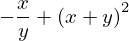

In [11]:
(x + y) ** 2 - x/y

Теперь попробуем сохранить какое-нибудь математическое выражение и поподставлять в него значения `x` и `y`:

In [12]:
expr = (x + y)**2
expr

In [13]:
expr.subs(x, 2)  # x=2

In [14]:
expr.subs(y, 8) # y=8

А теперь всё сразу:

In [15]:
expr.subs({x: 4, y:5}) # x=4, y=5

Оно ещё и посчиталось! Для вычисления значения выражения можно использовать специальный метод `evalf()` (от *evaluate function*):

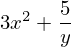

In [16]:
expr2 = 3 * x ** 2 + 5 / y
expr2

In [17]:
expr2.evalf(subs={x:2, y:4})

Теперь посмотрим на что-то более интересное. Посмотрим, как с помощью `sympy` можно упрощать выражения:

In [18]:
primer1 = 3 * (x - 2 * x) + 5 * x

In [19]:
primer1.simplify()  # упростили!

In [20]:
primer2 = (x + y) * 2
primer2.simplify() # тоже упростили

Или раскрывать скобки по известным формулам:

In [21]:
p = (x + y) ** 2

In [22]:
p.expand()

In [23]:
q = (x + y) ** 3
q.expand()

И даже по тригонометрическим формулам:

In [24]:
trig = sin(2 * x)

In [25]:
expand_trig(trig)

### Производные и решения уравнений в `sympy`

Для начала найдём простенькую производную первого порядка (первую производную) некоторой функции $f(x)$:

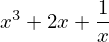

In [26]:
fx = x ** 3 + 2* x + 1/x 
fx

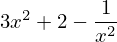

In [27]:
fx.diff(x) # дифференцируем по x

**Вопрос:** как найти значение производной в точке, если совместить `.diff()` и `.evalf()`?

Найдем производную второго порядка (вторую производную): 

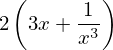

In [28]:
fx.diff(x, 2) # вторая производная по x

А теперь рассмотрим функцию от двух переменных:

In [29]:
fu = x ** y + y ** 3
fu

И найдем частные производные по `x` и `y`:

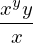

In [30]:
fu.diff(x)

In [31]:
fu.diff(y)

Теперь вернёмся к функции от одной переменной и попробуем решить стандартную задачу: найти точки экстремума функции. Для этого нам понадобится функция `solve()`, которая позволяет решать уравнения (по умолчанию выражение приравнивается к нулю). Посмотрим, как она работает. 

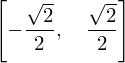

In [32]:
solve(2 * x ** 2 - 1) # 2x^2 -1

Теперь совместим: найдём производную и приравняем её к нулю:

In [33]:
f = sqrt(16 - 4 * x - x ** 2)
f

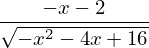

In [34]:
dv = f.diff(x)
dv

In [35]:
solve(dv) # приравниваем результат к 0

Так как вообще ответов может быть несколько, результат выдаётся в виде списка. Извлечём из него единственный элемент.

In [36]:
solve(dv)[0]

Пока мы проверили только необходимое условие существования экстремума. Пойдём дальше и посмотрим, что у нас со второй производной (может, это просто точка перегиба):

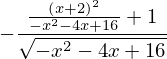

In [37]:
dv2 = f.diff(x, 2)
dv2

In [38]:
dv2.evalf(subs={x:-2})

В точке $-2$ значение второй производной меньше нуля. Полученная точка является точкой экстремума, а именно, точкой максимума функции. Конечно, в данном случае можно было обойтись и без этого, просто посмотреть на знаки значений производной функции при $x > -2$ и $x<-2$, но это вы можете проделать самостоятельно.